In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import time
import datetime as dt
import calendar

# Import CSV data files
full_data = "full_data.csv"
vix_data = "vixcurrent.csv"

# Read data files
full_data = pd.read_csv(full_data)
vix_data = pd.read_csv(vix_data)

world_cv_df = full_data.loc[full_data['location'] == 'World']
us_cv_df = full_data.loc[full_data['location'] == 'United States']
vix_data

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61
...,...,...,...,...,...
4093,04/07/2020,44.83,47.51,43.51,46.70
4094,04/08/2020,45.90,47.28,42.53,43.35
4095,04/09/2020,43.00,45.73,41.39,41.67
4096,04/13/2020,44.60,45.04,41.17,41.17


In [11]:
vix_date = vix_data['Date']

nvix_date = []
for item in vix_date:
    nv_date = time.mktime(dt.datetime.strptime(item, "%m/%d/%Y").timetuple())
    nvix_date.append(nv_date)
    
vix_data['Date'] = nvix_date
vix_data.columns = ['Date', 'VIX Open', 'VIX High', 'VIX Low', 'VIX Close']
vix_data

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1.073030e+09,17.96,18.68,17.54,18.22
1,1.073290e+09,18.45,18.49,17.44,17.49
2,1.073376e+09,17.66,17.67,16.19,16.73
3,1.073462e+09,16.72,16.75,15.50,15.50
4,1.073549e+09,15.42,15.68,15.32,15.61
...,...,...,...,...,...
4093,1.586243e+09,44.83,47.51,43.51,46.70
4094,1.586329e+09,45.90,47.28,42.53,43.35
4095,1.586416e+09,43.00,45.73,41.39,41.67
4096,1.586761e+09,44.60,45.04,41.17,41.17


In [12]:
world_date = world_cv_df['date']
nworld_date = []
for item in world_date:
    nw_date = time.mktime(dt.datetime.strptime(item, "%Y-%m-%d").timetuple())
    nworld_date.append(nw_date)

world_cv_df['date'] = nworld_date
world_cv_df.drop(columns='location', inplace=True)
world_cv_df.columns = ['Date', 'New Cases', 'New Deaths', 'Total Cases', 'Total Deaths']
world_cv_df

/Users/joemiller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/joemiller/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,New Cases,New Deaths,Total Cases,Total Deaths
10685,1.577779e+09,27,0,27,0
10686,1.577866e+09,0,0,27,0
10687,1.577952e+09,0,0,27,0
10688,1.578038e+09,17,0,44,0
10689,1.578125e+09,0,0,44,0
...,...,...,...,...,...
10786,1.586502e+09,87039,7223,1563857,95039
10787,1.586588e+09,89349,7049,1653206,102088
10788,1.586675e+09,81707,6104,1734913,108192
10789,1.586761e+09,72390,5321,1807303,113513


In [13]:
us_date = us_cv_df['date']
nus_date = []
for item in us_date:
    nu_date = time.mktime(dt.datetime.strptime(item, "%Y-%m-%d").timetuple())
    nus_date.append(nus_date)

us_cv_df['date'] = nworld_date
us_cv_df.drop(columns='location', inplace=True)
us_cv_df.columns = ['Date', 'New Cases', 'New Deaths', 'Total Cases', 'Total Deaths']
us_cv_df

/Users/joemiller/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/joemiller/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,New Cases,New Deaths,Total Cases,Total Deaths
10333,1.577779e+09,0,0,0,0
10334,1.577866e+09,0,0,0,0
10335,1.577952e+09,0,0,0,0
10336,1.578038e+09,0,0,0,0
10337,1.578125e+09,0,0,0,0
...,...,...,...,...,...
10434,1.586502e+09,33901,1873,466033,16690
10435,1.586588e+09,35527,2087,501560,18777
10436,1.586675e+09,28391,1831,529951,20608
10437,1.586761e+09,27620,1500,557571,22108


In [19]:
merged_df = pd.merge(world_cv_df, vix_data, on='Date', left_index=True)

# merged_df.set_index('Date')
datey = merged_df['Date']
ndatey = []
for item in datey:
    x = dt.datetime.utcfromtimestamp(item).strftime('%m/%d/%Y %H:%M:%S')
    y = x.split()
    ndatey.append(y[0])
merged_df['Date'] = ndatey
merged_df.set_index('Date')
merged_df

,Date,New Cases,New Deaths,Total Cases,Total Deaths,VIX Open,VIX High,VIX Low,VIX Close
4026,12/31/2019,27,0,27,0,14.84,15.39,13.75,13.78
4027,01/02/2020,0,0,27,0,13.46,13.72,12.42,12.47
4028,01/03/2020,17,0,44,0,15.01,16.20,13.13,14.02
4029,01/06/2020,0,0,59,0,15.45,16.39,13.54,13.85
4030,01/07/2020,0,0,59,0,13.84,14.46,13.39,13.79
...,...,...,...,...,...,...,...,...,...
4093,04/07/2020,71390,5137,1316986,74065,44.83,47.51,43.51,46.70
4094,04/08/2020,74902,7412,1391888,81477,45.90,47.28,42.53,43.35
4095,04/09/2020,84930,6339,1476818,87816,43.00,45.73,41.39,41.67
4096,04/13/2020,72390,5321,1807303,113513,44.60,45.04,41.17,41.17


In [20]:
merged_us_df = pd.merge(us_cv_df, vix_data, on='Date', left_index=True)
udatey = merged_us_df['Date']
nudatey = []
for item in udatey:
    x = dt.datetime.utcfromtimestamp(item).strftime('%m/%d/%Y %H:%M:%S')
    y = x.split()
    nudatey.append(y[0])
merged_us_df['Date'] = nudatey
merged_df.set_index('Date')
merged_us_df

,Date,New Cases,New Deaths,Total Cases,Total Deaths,VIX Open,VIX High,VIX Low,VIX Close
4026,12/31/2019,0,0,0,0,14.84,15.39,13.75,13.78
4027,01/02/2020,0,0,0,0,13.46,13.72,12.42,12.47
4028,01/03/2020,0,0,0,0,15.01,16.20,13.13,14.02
4029,01/06/2020,0,0,0,0,15.45,16.39,13.54,13.85
4030,01/07/2020,0,0,0,0,13.84,14.46,13.39,13.79
...,...,...,...,...,...,...,...,...,...
4093,04/07/2020,30561,1342,368196,10989,44.83,47.51,43.51,46.70
4094,04/08/2020,30613,1906,398809,12895,45.90,47.28,42.53,43.35
4095,04/09/2020,33323,1922,432132,14817,43.00,45.73,41.39,41.67
4096,04/13/2020,27620,1500,557571,22108,44.60,45.04,41.17,41.17


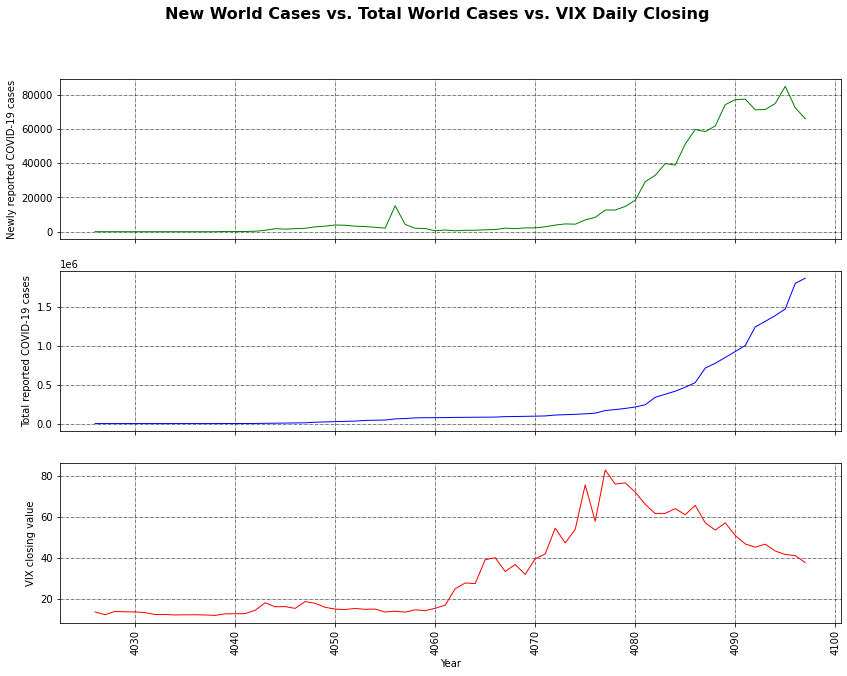

In [21]:
# merged_df['Date']=pd.to_datetime (merged_df['Date'])
# merged_df.set_index('Date')

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("New World Cases vs. Total World Cases vs. VIX Daily Closing", fontsize=16, fontweight="bold")

ax1.plot(merged_df['New Cases'], linewidth=1, color = "g")
ax1.set_ylabel("Newly reported COVID-19 cases")

ax2.plot(merged_df['Total Cases'], linewidth=1, color = "b")
ax2.set_ylabel("Total reported COVID-19 cases")

ax3.plot(merged_df['VIX Close'], linewidth=1, color="r")
ax3.set_ylabel("VIX closing value")

fig.set_figheight(10)
fig.set_figwidth(14)

ax3.set_xlabel("Year")

plt.xticks(rotation='vertical')

ax1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
ax2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
ax3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

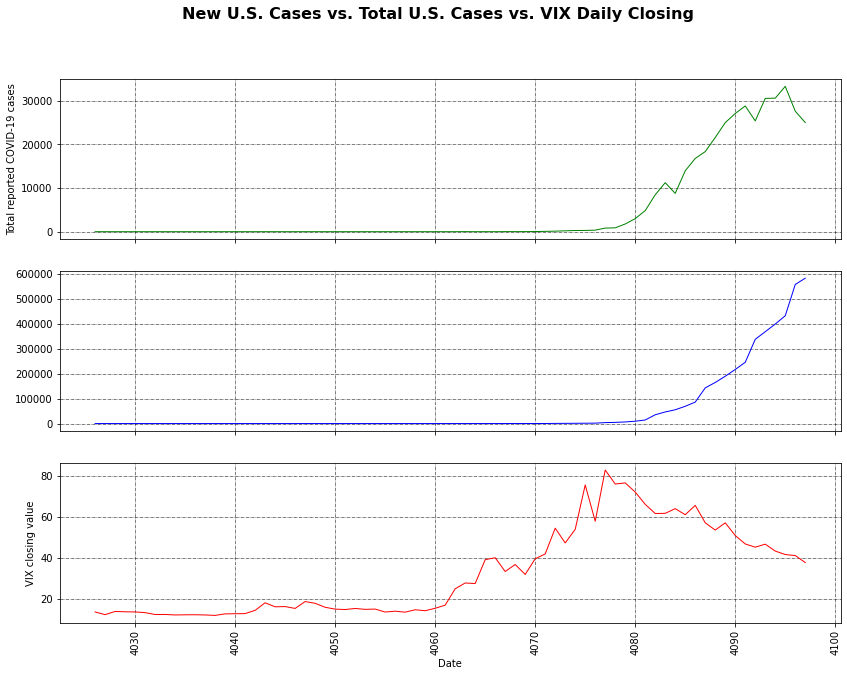

In [22]:
fig, (axu1, axu2, axu3) = plt.subplots(3, sharex=True)
fig.suptitle("New U.S. Cases vs. Total U.S. Cases vs. VIX Daily Closing", fontsize=16, fontweight="bold")

axu1.plot(merged_us_df['New Cases'], linewidth=1, color="g")
axu1.set_ylabel("Newly reported COVID-19 cases")

axu2.plot(merged_us_df['Total Cases'], linewidth=1, color="b")
axu1.set_ylabel("Total reported COVID-19 cases")

axu3.plot(merged_us_df['VIX Close'], linewidth=1, color="r")
axu3.set_ylabel("VIX closing value")

fig.set_figheight(10)
fig.set_figwidth(14)

axu3.set_xlabel("Date")

plt.xticks(rotation='vertical')

axu1.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axu2.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
axu3.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()